In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import glob
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import skimage.transform
import tensorflow as tf
# from skimage.util import view_as_blocks
import time
import io
import skimage as sk
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier

# from skimage.feature import hog
from sklearn import svm
# from segmentation_models import Unet


In [20]:
poza_labeled = [cv2.imread(file) for file in glob.glob('C:/Users/Rares/Documents/Python Scripts/CV_project/data/segmentation_preview/*.png')]
print(np.shape(poza_labeled))
# i=0
# for poza in range(np.shape(poza_labeled)[0]):
#     i=i+1
#     ceva = (poza_labeled[poza][70:-70,70:-70])
#     cv2.imwrite("C:/Users/Rares/Documents/Python Scripts/CV_project/data/segmentation_preview/%d.png" % i, ceva)
    

(30, 1228, 2060, 3)


In [41]:
import random
import os
import skimage.io
import scipy.misc
from skimage.transform import resize

# our folder path containing some images
def random_rotation(image_array_seg, image_array_orig, image_labels_seg):
    # pick a random degree of rotation between 25% on the left and 25% on the right
#     random_degree = random.uniform(-5, 5)
#     random_degree = 0
#     rot_seg = sk.transform.rotate(image_array_seg, random_degree)
#     rot_labels = sk.transform.rotate(image_labels_seg, random_degree)
#     rot_orig = sk.transform.rotate(image_labels_seg, random_degree)
    
    random_h = random.randrange(200,300 )
    random_w = random.randrange(200,300 )
    size = 750
    cropped_img_seg = image_array_seg[random_h:random_h+int(size*16/9)][random_w:random_w+size]
    cropped_labels_seg = image_labels_seg[random_h:random_h+int(size*16/9)][random_w:random_w+size]
    cropped_img_orig = image_array_orig[random_h:random_h+int(size*16/9)][random_w:random_w+size]
    dim = (1920,1088)
    
    resized_seg = cv2.resize(cropped_img_seg, dim)
    resized_labels_seg = resize(cropped_labels_seg,(1088,1920,4))
    resized_orig = cv2.resize(cropped_img_orig, dim)
    
    
    # add random noise to the image
    return resized_seg, resized_orig, resized_labels_seg
#     return rot_seg, rot_labels, rot_orig


# def random_noise(image_array_seg: ndarray, image_array_orig: ndarray):
#     # add random noise to the image
#     return image_array_seg, sk.util.random_noise(image_array_orig)

# def random_crop(image_array_seg: ndarray, image_array_orig: ndarray):
#     random_h = random.randrange(300,400 )
#     random_w = random.randrange(300,400 )
#     print(random_h)
#     print(np.shape(image_array_seg))
#     cropped_img_seg = image_array_seg[random_w:random_w+800][random_h:random_h+400]
#     cropped_img_orig = image_array_orig[random_w:random_w+800][random_h:random_h+400]
#     dim = (1920,1080)
#     resized_seg = cv2.resize(cropped_img_seg, dim, interpolation = cv2.INTER_AREA)
#     resized_orig = cv2.resize(cropped_img_orig, dim, interpolation = cv2.INTER_AREA)
    
    
    # add random noise to the image
    return resized_seg, resized_orig

def horizontal_flip(image_array_seg, image_array_orig, image_labels_seg):
    # horizontal flip doesn't need skimage, it's easy as flipping the image array of pixels !
    return image_array_seg[:, ::-1], image_array_orig[:, ::-1], image_labels_seg[:, ::-1]

# def vertical_flip(image_array_seg: ndarray, image_array_orig: ndarray):
#     # horizontal flip doesn't need skimage, it's easy as flipping the image array of pixels !
#     return image_array_seg[::-1, :], image_array_orig[::-1, :]

# dictionary of the transformations we defined earlier
available_transformations = {
    'rotate': random_rotation,
    'horizontal_flip': horizontal_flip,
}

folder_path_seg = 'data'
folder_path_orig = 'data'

num_files_desired = 56

# find all files paths from the folder
images_seg = [file for file in sorted(glob.glob('data/segmentation_preview/*.png'))]
labels_seg = [file for file in sorted(glob.glob('data/segmentation_preview/*.npz'))]
images_orig = [file for file in sorted(glob.glob('data/Selected_frames/*.png'))]


for nr_img in range(np.shape(images_seg)[0]):
    image_path_seg = images_seg[nr_img]
    labels_path_seg = labels_seg[nr_img]
    image_path_orig = images_orig[nr_img]
    
    image_to_transform_seg = sk.io.imread(image_path_seg)
    image_to_transform_seg = image_to_transform_seg[70:1158, 70:1990, :]
    labels_to_transform_seg = np.load(labels_path_seg)['arr_0']
    labels_to_transform_seg = labels_to_transform_seg[70:1158, 70:1990, :]
    labels_to_transform_seg = labels_to_transform_seg[:,:,[1,2,4,6]]
    image_to_transform_orig = sk.io.imread(image_path_orig)
    skimage.io.imsave('data/Augmented_data/' + str(nr_img).zfill(3) + '_seg.png', image_to_transform_seg)
    skimage.io.imsave('data/Augmented_data/' + str(nr_img).zfill(3) + '.png', image_to_transform_orig)
    np.savez('data/Augmented_data/' + str(nr_img).zfill(3) + '_label.npz', labels_to_transform_seg)
    

num_generated_files = 0
while num_generated_files <= num_files_desired:
    # random image from the folder
    index_rand = random.randrange(np.shape(images_seg)[0])
    image_path_seg = images_seg[index_rand]
    labels_path_seg = labels_seg[index_rand]
    image_path_orig = images_orig[index_rand]
    # read image as an two dimensional array of pixels
    
    image_to_transform_seg = sk.io.imread(image_path_seg)
    image_to_transform_seg = image_to_transform_seg[70:1158, 70:1990, :]
    labels_to_transform_seg = np.load(labels_path_seg)['arr_0']
    labels_to_transform_seg = labels_to_transform_seg[70:1158, 70:1990, :]
    labels_to_transform_seg = labels_to_transform_seg[:,:,[1,2,4,6]]
    image_to_transform_orig = sk.io.imread(image_path_orig)
    
    transformed_image_seg = None
    transformed_labels_seg = None
    transformed_image_orig = None
    
    random_nr = random.randrange(0,2)
#     random_nr =0
    random_nr2 = random.randrange(0,2)
    
    if random_nr == 0:
        transformed_image_seg, transformed_image_orig, transformed_labels_seg = available_transformations['rotate'](image_to_transform_seg, image_to_transform_orig, labels_to_transform_seg)
        if random_nr2 == 0:
            transformed_image_seg, transformed_image_orig, transformed_labels_seg = available_transformations['horizontal_flip'](transformed_image_seg, transformed_image_orig, transformed_labels_seg)
    else:
        transformed_image_seg, transformed_image_orig, transformed_labels_seg = available_transformations['horizontal_flip'](image_to_transform_seg, image_to_transform_orig, labels_to_transform_seg)
#     print(np.shape(transformed_labels_seg))
#     poza = np.zeros((1080,1920,3))
#     for i in range(1080):
#         for j in range(1920):
#             if transformed_labels_seg[i][j][0] == 1:
#                 poza[i][j][0] = 255
#             if transformed_labels_seg[i][j][1] == 1:
#                 poza[i][j][1] = 255
#             if transformed_labels_seg[i][j][2] == 1:
#                 poza[i][j][2] = 255

#     plt.imshow(poza)
#     plt.show()
#     num_transformations += 1
#     plt.imshow(transformed_image_seg)
#     plt.show()
    
    skimage.io.imsave('data/Augmented_data/' + str(np.shape(images_seg)[0]+num_generated_files).zfill(3) + '_seg.png', transformed_image_seg)
    skimage.io.imsave('data/Augmented_data/' + str(np.shape(images_seg)[0]+num_generated_files).zfill(3) + '.png', transformed_image_orig)
    np.savez('data/Augmented_data/' + str(np.shape(images_seg)[0]+num_generated_files).zfill(3) + '_label.npz', transformed_labels_seg)
    num_generated_files += 1
    print(num_generated_files)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57


(1228, 2060, 12)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


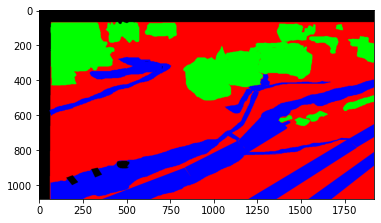

In [37]:
labels = np.load('data/segmentation_preview/seg_frame5401.npz')['arr_0']
print(np.shape(labels))
poza = np.zeros((1088,1920,3))
for i in range(1088):
    for j in range(1920):
        if labels[i][j][1] == 1:
            poza[i][j][0] = 255
        if labels[i][j][2] == 1:
            poza[i][j][1] = 255
        if labels[i][j][4] == 1:
            poza[i][j][2] = 255

plt.imshow(poza)
plt.show()